Advanced Syn Bio: Modeling
===
Prof. Eric Klavins

&copy; 2019, University of Washington

Import required libraries
---

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math
%matplotlib inline

Dynamical Systems
---
Let $x$ be an $n$ dimensional vector. A continuous, autonomous dynamical system has the form
     
> $\dot x = f(x)$
 
stating how each component of $x$ changes with time. For example, to represent a protein expression with protein concentration $p$ and rna concentration $r$, we can write
 
> $\dot{\left (
\begin{array}{c} 
r \\ 
p
\end{array} \right )} = 
\left (
\begin{array}{c} 
k_1 - k_2 r \\ 
k_3 r - k_4 p
\end{array} \right )
$ 
      
where $k_i$ is a constant for $i=1$ to $4$. 

In this case, 

> $x = \left (
\begin{array}{c}
  r \\ 
  p
\end{array} \right )\;$  and $\;f(x) = \left ( \begin{array}{c} 
k_1 - k_2 r  \\ 
k_3 r - k_4 p
\end{array} \right )$

Dynamical Systems in Python
---

**Protein Expression**: To represent the falling object system in Python, we write:

In [2]:
def f_prot(x,t):
  r,p = x
  k1=1
  k2=0.1
  k3=1;
  k4=0.1;
  return [k1 - k2*r, k3*r - k4*p]

* Note that the vector $x$ and the return value of $f$ are represented in Python as row vectors instead of as column vectors like in our text book. 
* Also note that the function `f_prot` also takes a second parameter,$ $t, which stands for time. This is because we will later be using these functions with Python's ordinary differential equation solver, and it needs functions of this form. Our model could include time explicitly in the vector it returns, but for now we will not use that feature.

**Growth**: Another example is bacterial growth with biomass $x$ and nutrient mass $n$ (see [Monod's Equation](https://en.wikipedia.org/wiki/Monod_equation)).

As discussed in class, the equations are:

> $\dot{\left (
\begin{array}{c} 
x \\ 
n
\end{array} \right )} = 
\left (
\begin{array}{c} 
\frac{v x n}{k+n} \\ 
-\gamma\frac{v x n}{k+n}
\end{array} \right )
$

To model this system in Python we write:

In [60]:
def f_growth(x,t):
  xx, n = x; # Note, need a local name for biomass x
  v = 1;
  k = 0.5;
  gamma = 4;
  g = v*xx*n / ( k + n )
  return [g, -gamma*g]

Working with Dynamical System Functions
===

Each of these models can be evaluated at particular values of $x$. For example, at the point $r=1$, $p=0$, the system's rate of change is

In [5]:
f_prot([1,0],0)

[0.9, 1.0]

On the other hand, at the point $r=0$, $p=1$, the rate of change is

In [62]:
f_prot([0,1],0)

[1.0, -0.1]

The equilibrium of the protein example is when $r^*=k_1/k_2$ and $p^*=k_1k_3/k_2k_4$, which for the constants we have chosen is $10,100$:

In [63]:
f_prot([10,100],0)

[0.0, 0.0]

For the chemstat, it is interesting to evaluate the model at various  points:

In [64]:
[
    f_growth([0,1],0),
    f_growth([1,0],0),
    f_growth([1,1],0),
    f_growth([1,10],0),
    f_growth([1,100],0)
]

[[0.0, -0.0],
 [0.0, -0.0],
 [0.6666666666666666, -2.6666666666666665],
 [0.9523809523809523, -3.8095238095238093],
 [0.9950248756218906, -3.9800995024875623]]

Phase Portraits
===

We can draw 2D system models by drawing vectors for a number of points in the plane. For example, with the protein expression example we might grid $r$ into points from 0 to 10 and protein into points from 0 to 100. 

In Python, we can write the following to make a grid of values for which to evaluate the model. The `meshgrid` function from numpy helps with this. Here is a simple example of the use of `meshgrid`.

In [21]:
X,Y = np.meshgrid([0,5,10],[0,50,100])
print(X)
print("---")
print(Y)

[[ 0  5 10]
 [ 0  5 10]
 [ 0  5 10]]
---
[[  0   0   0]
 [ 50  50  50]
 [100 100 100]]


We can determine the "shape" of a meshgrid component using the shape attribute:

In [14]:
X.shape

(3, 3)

Now by going through `X[i],Y[j]` for `i=0 to X.shape-1` and `j=0 to Y.shape -1` we get all pairs of coordinates on which to evaluate our dynamical system function.

To make a larger grid, we use `linspace`:

In [26]:
r = np.linspace(0,11, 19)
p = np.linspace(0,110, 19)
R,P = np.meshgrid(r,p)

Next, we make a grid of vectors to store the resulting evaluations.

In [27]:
Rdot,Pdot = np.zeros(R.shape), np.zeros(P.shape)

Then we evaluate the model at each point in the grid, storing the resulting vectors in Rdot,Pdot:

In [67]:
n,m = R.shape
for i in range(n):
  for j in range(m):
    Rdot[i,j],Pdot[i,j] = f_prot([R[i,j],P[i,j]],0)

Once we have all the vectors defined, we can use the `quiver` method to draw all of them on the $r-p$ plane.

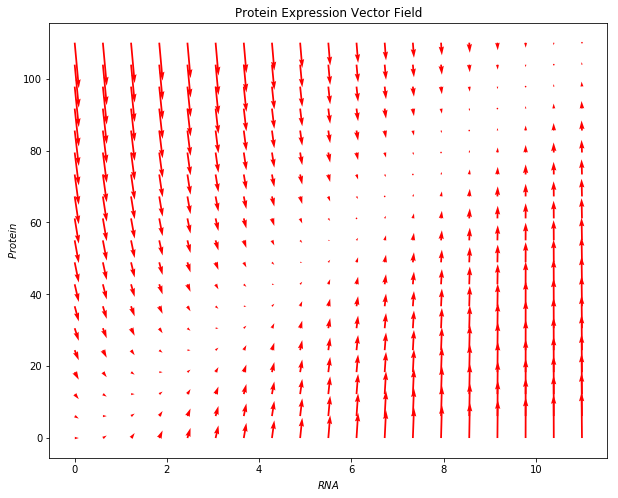

In [68]:
plt.rcParams['figure.figsize'] = [10,8]
Q = plt.quiver(R, P, Rdot, Pdot, color='r')
plt.xlabel('$RNA$')
plt.ylabel('$Protein$');
plt.title("Protein Expression Vector Field");

Here is an example with a more interesting behavior comes from a simple chemical reaction that oscillates:

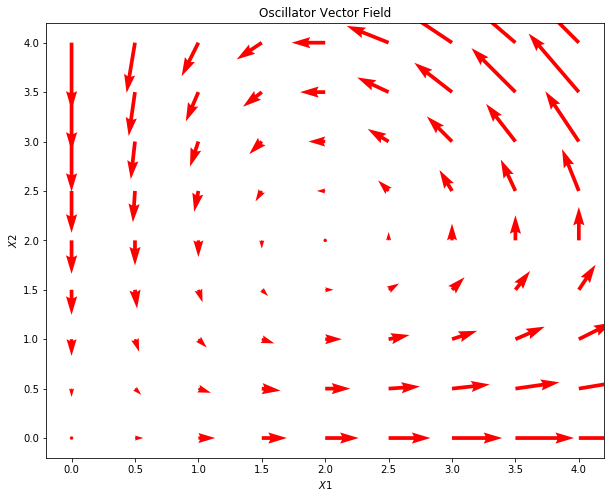

In [69]:
def f_osc(x,t):
    return [
        2*x[0]-x[0]*x[1],
        -2*x[1]+x[0]*x[1]
    ]
X1,X2 = np.meshgrid(np.linspace(0,4,9),np.linspace(0,4,9))
X1dot,X2dot = np.zeros(X1.shape), np.zeros(X2.shape)
n,m=X1.shape
for i in range(n):
  for j in range(m):
    X1dot[i,j],X2dot[i,j]  = f_osc([X1[i,j],X2[i,j]],0)
plt.rcParams['figure.figsize'] = [10,8]
Q = plt.quiver(X1, X2, X1dot, X2dot, color='r')
plt.xlabel('$X1$')
plt.ylabel('$X2$');
plt.title("Oscillator Vector Field");    

Solving Systems of ODEs
===

A *solution* to an ODE $\dot x = f(x)$ is a function $x(t)$ that satisfies the equation. Linear systems have explicitly, analytical solutions, as do some nonlinear systems. However, in general , nonlinear systems do not have analytical solutions. 

As an example of a simple linear system that does have a solution, consider the equation

> $\dot x = -x$

with $x(0) = 1$. The solution to this ODE is 

> $x(t) = e^{-t}.$

Taking the derivative of $x(t)$ gives $-e^{-t}$, which is indeed $-x$. 

We can also *numerically* solve the equation using the ODE solver $odeint$ from scipy. In this case, we first have to define our ODE using the form introduced above:

In [16]:
def f(x,t):
    return -x

Then define a set ot $t$ values over which to solve the ODE and call the solver with the function, an initial condition, and the $t$ values.

In [17]:
t = np.linspace(0., 10, 6)
x1 = spi.odeint(f,1,t);
x2 = spi.odeint(f,2,t);
x

array([[  1.00000000e+00],
       [  1.35335278e-01],
       [  1.83156390e-02],
       [  2.47875320e-03],
       [  3.35461697e-04],
       [  4.54009265e-05]])

Once we have a trajectory, we can plot it just like we plot other functions.

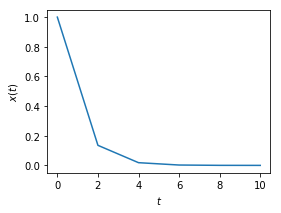

In [22]:
plt.rcParams['figure.figsize'] = [4,3]
plt.plot(t,x);
plt.xlabel('$t$');
plt.ylabel('$x(t)$');

Accuracy
===
The accuracy of the ODE solver is quite high by default. You can see this by looking at the different between the numerical and exact solutions.

Notice that the `x` returned by the solver is a 6x1 matrix, but `t` is a length 6 array. To turn $x$ into a list, we do `x.flatten()`.

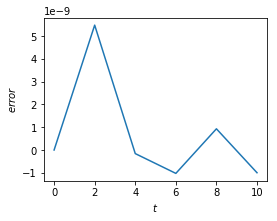

In [23]:
plt.plot(t,np.exp(-t)-x.flatten());
plt.xlabel('$t$');
plt.ylabel('$error$');

Increasing the number of time points does not necessary increase the accuracy, because the solver actually evaluates the ODE at many intermediate points.

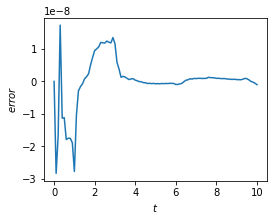

In [24]:
t = np.linspace(0., 10, 101)
x = spi.odeint(f,1,t);
plt.plot(t,np.exp(-t)-x.flatten());
plt.xlabel('$t$');
plt.ylabel('$error$');

However, you can control the accuracy with options to `odeint`. For example `rtol` and `atol` control the error tolerances. Increasing them likely increases the speed of the solver, but also decreases accuracy.

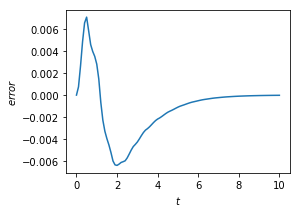

In [25]:
t = np.linspace(0., 10, 101)
x = spi.odeint(f,1,t,rtol=0.1,atol=0.1);
plt.plot(t,np.exp(-t)-x.flatten());
plt.xlabel('$t$');
plt.ylabel('$error$');

You can almost always just trust the defaults, but if you get innacurate results, you can start adjusting the parameters of `odeint`. To see what all is available, use the ? Jupyter method:

In [70]:
?spi.odeint

Trajectories
===

We can now look in more detail at the oscillator by solving for a few different initial conditions and plotting the resulting trajectories as functions of time.

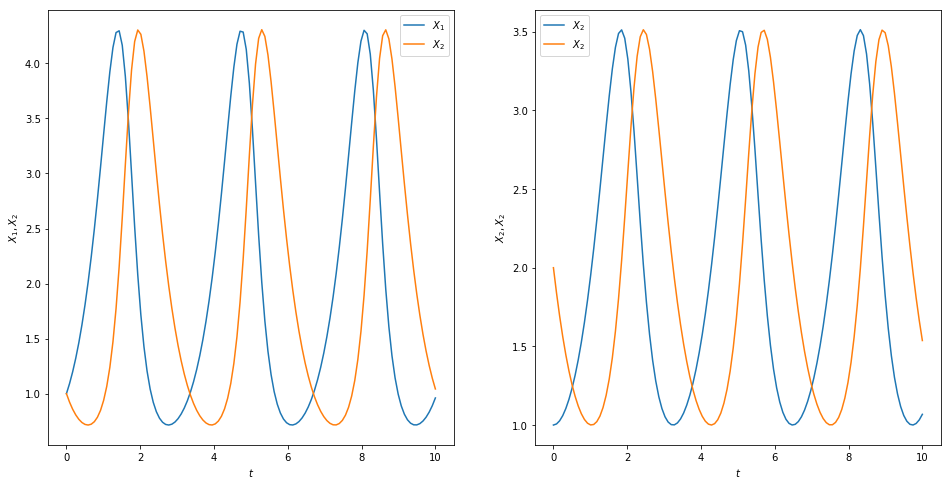

In [56]:
t = np.linspace(0., 10, 120)
x1 = spi.odeint(f_osc,[1,1],t);
x2 = spi.odeint(f_osc,[1,2],t);
fig, ax = plt.subplots(1, 2, figsize=(16,8))

ax[0].plot(t,x1[:,0],label="$X_1$");
ax[0].plot(t,x1[:,1],label="$X_2$");
ax[1].plot(t,x2[:,0],label="$X_2$");
ax[1].plot(t,x2[:,1],label="$X_2$");

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$X_1,X_2$')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$X_2,X_2$')

ax[0].legend();
ax[1].legend();

A particularly pleasing plot can be made by superimposing the trajectories on the vector field plot as follows.

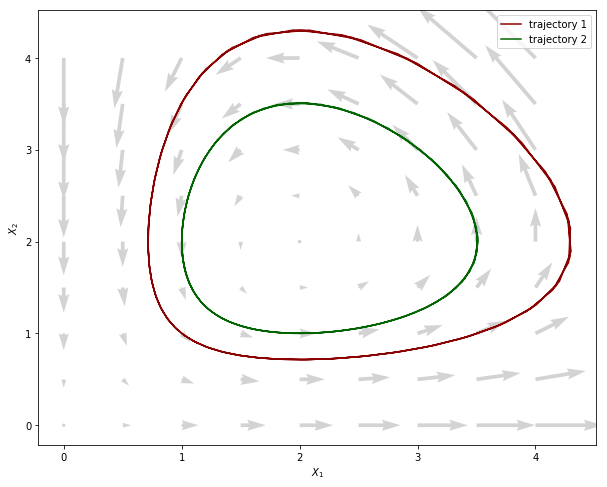

In [57]:
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(x1[:,0],x1[:,1],label="trajectory 1", color='darkred');
plt.plot(x2[:,0],x2[:,1],label="trajectory 2", color='darkgreen');
plt.quiver(X1, X2, X1dot, X2dot, color='lightgrey')
plt.xlabel('$X_1$');
plt.ylabel('$X_2$');
plt.legend();